Testing out a new inter and intra-night metrics:

compute the median gap between observations within a night (only including nights that have multiple observations).
And the median gap between the last observation in a night and the first observation in the next night.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plotters

In [2]:
runs = {'ops2_1098':'Pairs','ops2_1093':'No Pairs'}

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter = "r"
Found 535139 visits
Running:  ['opsim_Median_Inter-Night_Gap_ops2_1098_HEAL', 'opsim_Median_Intra-Night_Gap_ops2_1098_HEAL']
Completed metric generation.

/Users/yoachim/lsst/DarwinX86/anaconda/master-g68783b1848/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3758: SAWarning: Textual SQL expression 'filter = "r"' should be explicitly declared as text('filter = "r"') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})
Optimal bin calculation tried to make 25186 bins, returning 200



Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter = "r" sqlconstraint now.
Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter = "r"
Found 544066 visits
Running:  ['opsim_Median_Intra-Night_Gap_ops2_1093_HEAL', 'opsim_Median_Inter-Night_Gap_ops2_1093_HEAL']
Completed metric generation.

Optimal bin calculation tried to make 1499 bins, returning 200
Optimal bin calculation tried to make 2413 bins, returning 200



Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter = "r" sqlconstraint now.
Plotting complete.


Optimal bin calculation tried to make 23190 bins, returning 200


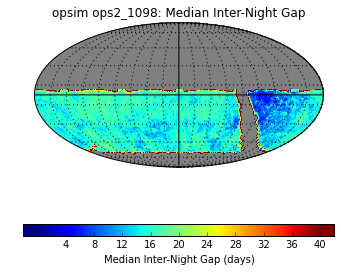

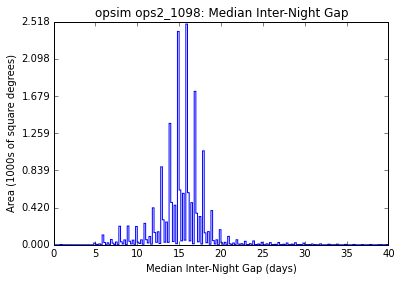

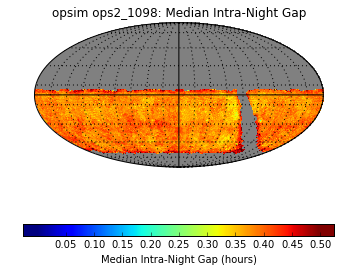

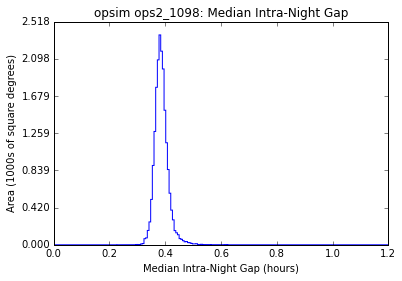

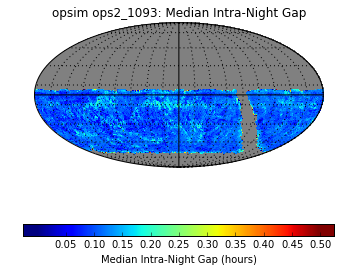

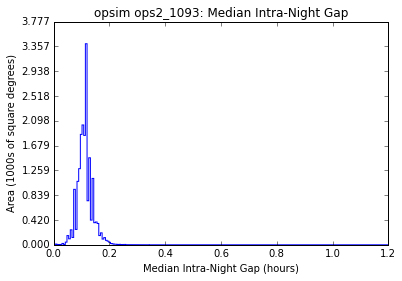

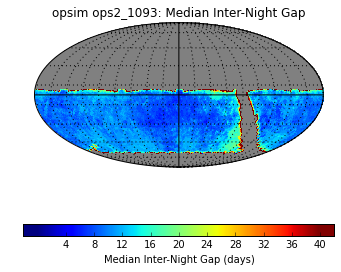

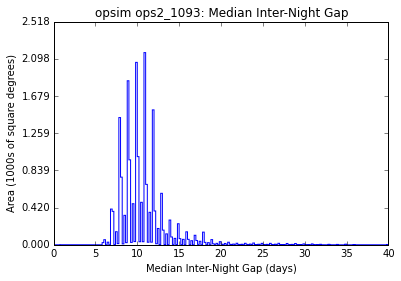

In [3]:
for runName in runs:
    # Set up the database connection
    opsdb = db.OpsimDatabase(runName+'_sqlite.db')
    md = runName#runs[runName]
    outDir = 'intraDay'
    resultsDb = db.ResultsDb(outDir=outDir)
    plotList = [plotters.HealpixSkyMap(), plotters.HealpixHistogram()]
    slicer=slicers.HealpixSlicer()
    metric = metrics.IntraNightGapsMetric()
    metric2 = metrics.InterNightGapsMetric()
    plotDict = {'cmap':'jet', 'colorMin':0,'colorMax':0.5, 'xMin':0,'xMax':1.2}
    plotDict2 = {'cmap':'jet', 'colorMin':0,'colorMax':40, 'xMin':0,'xMax':40}
    plotDict3 = {'cmap':'jet', 'colorMin':0,'colorMax':40, 'xMin':0,'xMax':40}
    sql = 'filter = "r"'
    bundleList = []
    #bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, 
    #                                             plotFuncs=plotList, metadata=md))
    #bundleList.append(metricBundles.MetricBundle(metric2,slicer,sql, plotDict=plotDict2, plotFuncs=plotList))

    slicer=slicers.HealpixSlicer(lonCol='ditheredRA', latCol='ditheredDec')
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, 
                                                 metadata=md, plotFuncs=plotList))
    bundleList.append(metricBundles.MetricBundle(metric2,slicer,sql, plotDict=plotDict2, 
                                                 metadata=md, plotFuncs=plotList))

    bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
    bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with no constraint.
Found 2454413 visits
Running:  ['opsim_Median_Inter-Night_Gap_ops2_1098_HEAL', 'opsim_Median_Intra-Night_Gap_ops2_1098_HEAL']
Completed metric generation.

Optimal bin calculation tried to make 86935 bins, returning 200
Optimal bin calculation tried to make 3308 bins, returning 200



Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  sqlconstraint now.
Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with no constraint.
Found 2455248 visits
Running:  ['opsim_Median_Intra-Night_Gap_ops2_1093_HEAL', 'opsim_Median_Inter-Night_Gap_ops2_1093_HEAL']
Completed metric generation.

Optimal bin calculation tried to make 4120 bins, returning 200
Optimal bin calculation tried to make 1571491 bins, returning 200



Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  sqlconstraint now.
Plotting complete.


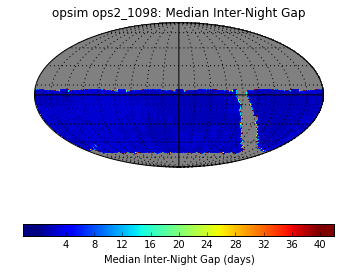

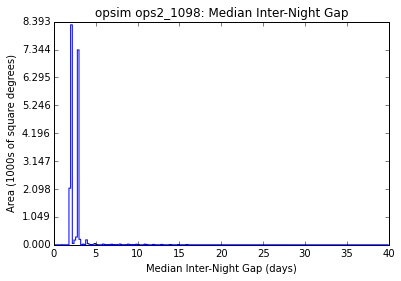

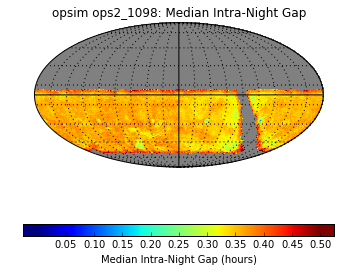

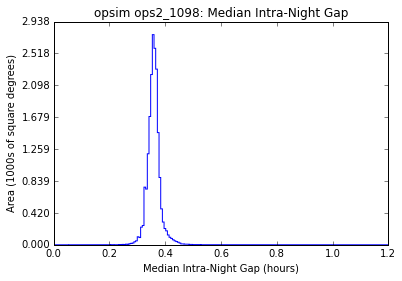

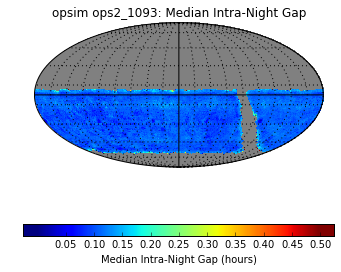

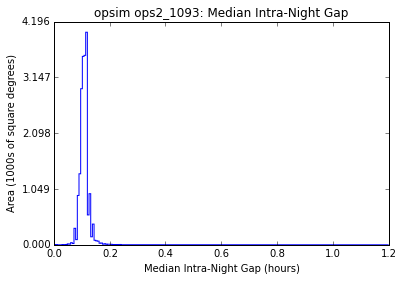

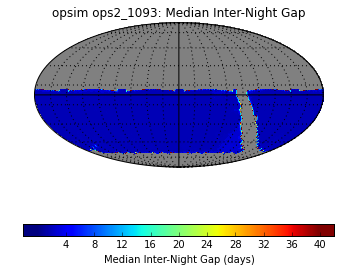

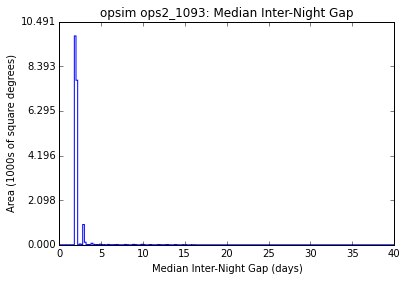

In [4]:
for runName in runs:
    # Set up the database connection
    opsdb = db.OpsimDatabase(runName+'_sqlite.db')
    md = runName
    outDir = 'intraDay'
    resultsDb = db.ResultsDb(outDir=outDir)
    plotList = [plotters.HealpixSkyMap(), plotters.HealpixHistogram()]
    slicer=slicers.HealpixSlicer()
    metric = metrics.IntraNightGapsMetric()
    metric2 = metrics.InterNightGapsMetric()
    plotDict = {'cmap':'jet', 'colorMin':0,'colorMax':0.5, 'xMin':0,'xMax':1.2}
    plotDict2 = {'cmap':'jet', 'colorMin':0,'colorMax':40, 'xMin':0,'xMax':40}
    plotDict3 = {'cmap':'jet', 'colorMin':0,'colorMax':40, 'xMin':0,'xMax':40}
    bundleList = []
    #bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, 
    #                                             plotFuncs=plotList, metadata=md))
    #bundleList.append(metricBundles.MetricBundle(metric2,slicer,sql, plotDict=plotDict2, plotFuncs=plotList))

    slicer=slicers.HealpixSlicer(lonCol='ditheredRA', latCol='ditheredDec')
    bundleList.append(metricBundles.MetricBundle(metric,slicer,'', plotDict=plotDict, 
                                                 metadata=md, plotFuncs=plotList))
    bundleList.append(metricBundles.MetricBundle(metric2,slicer,'', plotDict=plotDict2, 
                                                 metadata=md, plotFuncs=plotList))
    
    bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
    bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)

Note the histograms look a bit spikey because we are looking at only the r band. If we include all filters, the median gap drops to 3-4 days.

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter="r"
Found 544066 visits
Running:  ['opsim_Max_nightly_gap_Pairs_HEAL']
Completed metric generation.

/Users/yoachim/lsst/DarwinX86/anaconda/master-g68783b1848/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3758: SAWarning: Textual SQL expression 'filter="r"' should be explicitly declared as text('filter="r"') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})
Optimal bin calculation tried to make 487 bins, returning 200



Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="r" sqlconstraint now.
Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter="r"
Found 544066 visits
Running:  ['opsim_Max_nightly_gap_No_Pairs_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="r" sqlconstraint now.
Plotting complete.


Optimal bin calculation tried to make 487 bins, returning 200


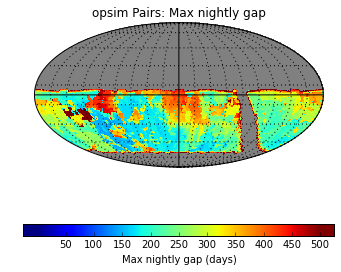

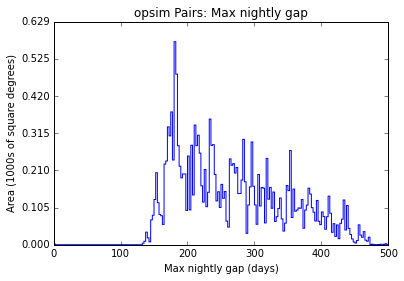

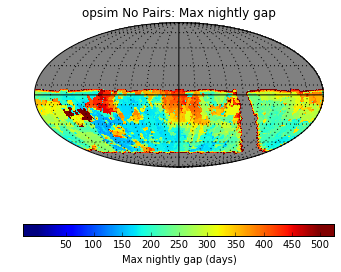

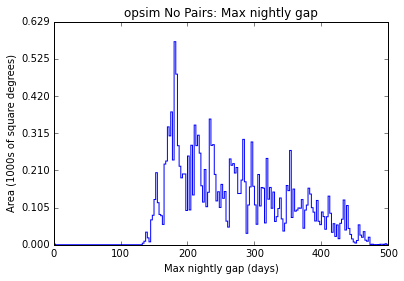

In [6]:
for runName in runs:
    md = runs[runName]
    metric3 = metrics.InterNightGapsMetric(reduceFunc=np.max, metricName='Max nightly gap')
    plotDict3 = {'cmap':'jet', 'colorMin':0,'colorMax':500, 'xMin':0,'xMax':500}
    bundleList = []

    slicer=slicers.HealpixSlicer(lonCol='ditheredRA', latCol='ditheredDec')
    bundleList.append(metricBundles.MetricBundle(metric3,slicer,'filter="r"',plotDict=plotDict3, plotFuncs=plotList,
                                                 metadata=md))

    bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
    bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with no constraint.
Found 2455248 visits
Running:  ['opsim_Max_nightly_gap_Pairs_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  sqlconstraint now.
Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with no constraint.
Found 2455248 visits
Running:  ['opsim_Max_nightly_gap_No_Pairs_HEAL']
Completed metric generation.

Optimal bin calculation tried to make 530 bins, returning 200
Optimal bin calculation tried to make 530 bins, returning 200



Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  sqlconstraint now.
Plotting complete.


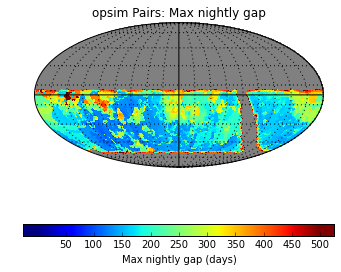

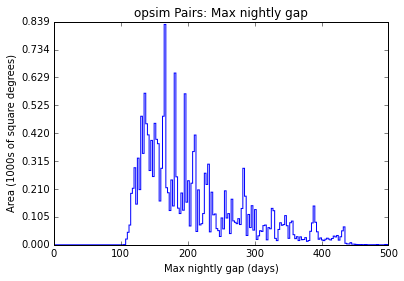

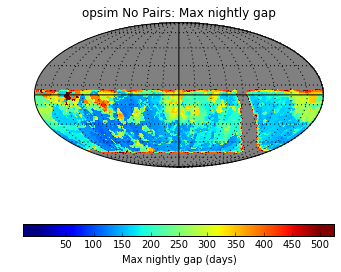

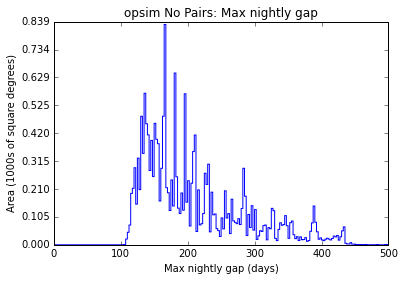

In [7]:
for runName in runs:
    md = runs[runName]
    metric3 = metrics.InterNightGapsMetric(reduceFunc=np.max, metricName='Max nightly gap')
    plotDict3 = {'cmap':'jet', 'colorMin':0,'colorMax':500, 'xMin':0,'xMax':500}
    bundleList = []

    slicer=slicers.HealpixSlicer(lonCol='ditheredRA', latCol='ditheredDec')
    bundleList.append(metricBundles.MetricBundle(metric3,slicer,'',plotDict=plotDict3, plotFuncs=plotList,
                                                 metadata=md))

    bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
    bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter="r"
Found 571103 visits
Running:  ['opsim_Median_Gap_No_Pairsdithered_HEAL', 'opsim_Median_Inter-Night_Gap_No_Pairsdithered_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="r" sqlconstraint now.
Plotting complete.
Querying database with constraint filter="r"
Found 546216 visits
Running:  ['opsim_Median_Inter-Night_Gap_Pairsdithered_HEAL', 'opsim_Median_Gap_Pairsdithered_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="r" sqlconstraint now.
Plotting complete.
Querying database with constraint filter="r"
Found 539642 visits
Running:  ['opsim_Median_Inter-Night_Gap_Triplesdithered_HEAL', 'opsim_Median_Gap_Triplesdithered_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed

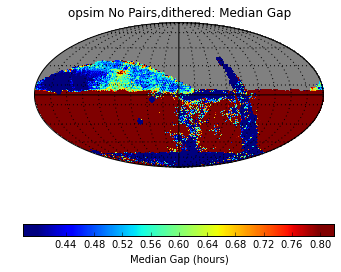

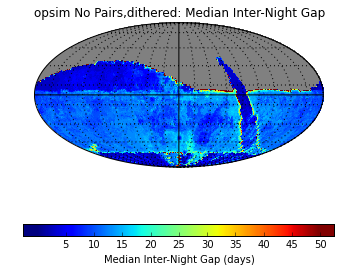

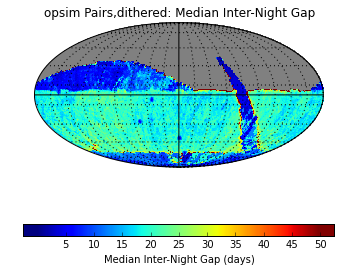

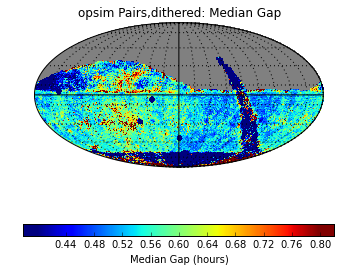

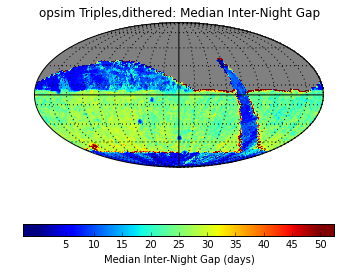

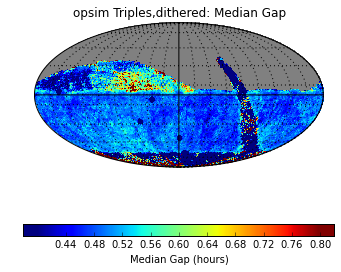

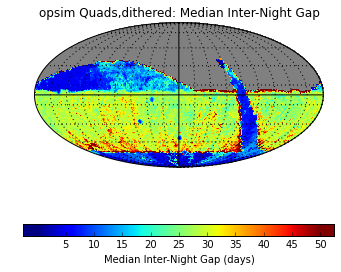

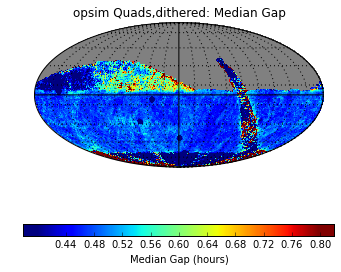

In [19]:
# OK, now let's look at the median time gap for each of the runs
plotList = [plotters.HealpixSkyMap()]
plotDict = {'cmap':'jet', 'colorMin':0.4,'colorMax':0.8, 'xMin':0,'xMax':40, 'logScale':False}
plotDict2 = {'cmap':'jet','colorMin':0, 'colorMax':50,  'logScale':False}
sql = 'filter="r"'
metric = metrics.AveGapMetric(metricName='Median Gap')
metric2 = metrics.InterNightGapsMetric()
runs = {'ops2_1094':'No Pairs', 'enigma_1257':'Pairs', 'enigma_1258':'Triples', 'enigma_1259':'Quads'}
orderedRuns = ['ops2_1094','enigma_1257','enigma_1258','enigma_1259']
outDir = 'Avegap'
resultsDb = db.ResultsDb(outDir=outDir)
bundleList = []
slicer=slicers.HealpixSlicer(lonCol='ditheredRA', latCol='ditheredDec')
for runName in orderedRuns:
    bundleList = []
    opsdb = db.OpsimDatabase('/Users/yoachim/Scratch/Opsim_sqlites/'+runName+'_sqlite.db')
    md = runs[runName]
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, 
                                                 metadata=md+',dithered', plotFuncs=plotList))
    bundleList.append(metricBundles.MetricBundle(metric2,slicer,sql, plotDict=plotDict2, 
                                                 metadata=md+',dithered', plotFuncs=plotList))
    bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
    bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)
 